### Comparison betweeen clusters

### Data loading

In [1]:
import pandas as pd
cluster = pd.read_csv('../cluster_hippo.csv', index_col=0)
cluster.head()

,Cluster
DepMap_ID,
ACH-000001,2
ACH-000004,0
ACH-000005,0
ACH-000007,1
ACH-000009,3


In [2]:
chronos = pd.read_csv("../data/CRISPR_gene_effect.csv",index_col=0)
chronos.columns = [c.split()[0].upper() + '_Chronos' for c in chronos.columns]
expression = pd.read_csv("../data/CCLE_expression.csv", index_col=0)
expression.columns = [c.split()[0].upper()+'_Expression' for c in expression.columns]
sample_info = pd.read_csv("../data/sample_info.csv", index_col=0)
ch_ex = chronos.merge(expression, right_index=True, left_index=True).dropna()
ch_ex['Cluster'] = cluster['Cluster']


### Heatmaps and Violin plots Fig. 3

  0%|          | 0/5 [00:00<?, ?it/s]

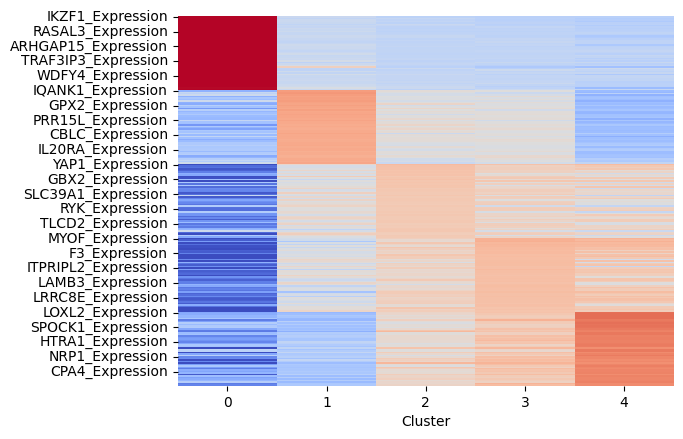

In [ ]:
#Fig. 3a
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

norm_ch_ex = pd.DataFrame(StandardScaler().fit_transform(ch_ex), columns=ch_ex.columns, index=ch_ex.index)
norm_ch_ex['Cluster'] = ch_ex['Cluster']
ch_exg = norm_ch_ex.groupby("Cluster").mean().copy().T

from tqdm.notebook import tqdm
results = []

for i in tqdm(range(5)):
    df_filtered = ch_exg[ch_exg[i] == ch_exg.max(axis=1)].copy()
    df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
    df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=False)
    results.append(df_sorted.index.tolist())

rows = []
for i in range(5):
    ex_results = [r for r in results[i] if 'Expression' in r]
    rows += ex_results[:50]
a = ch_exg.loc[rows]

high_exp = ex_results[:50]  #Cluster4=Hippo_strong

sns.heatmap(a, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)
plt.show()

C:\Users\ki949\AppData\Local\Temp\ipykernel_4784\980676676.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", 5)
C:\Users\ki949\AppData\Local\Temp\ipykernel_4784\980676676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0)


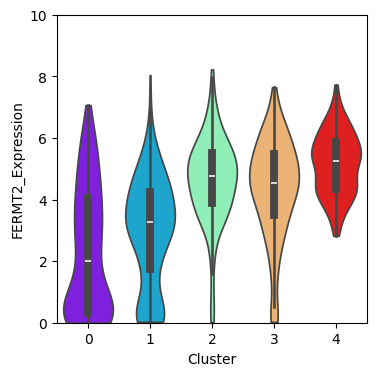

In [3]:
#Fig. 3c
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap("rainbow", 5) 
custom_palette = [cmap(i) for i in range(5)]
custom_palette = [(cmap(i)[0], cmap(i)[1], cmap(i)[2], 0.5) for i in range(5)]
value = "FERMT2_Expression"

plt.figure(figsize=(4, 4))
sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0) 
plt.ylim(0, 10)
plt.savefig("../result/figure.svg")
plt.show()

In [8]:
import scikit_posthocs as sp
import numpy as np
x = [[1,2,3,5,1], [12,31,54, np.nan], [10,12,6,74,11]]
sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3
1,1.000000,0.030535,0.061677
2,0.030535,1.000000,0.484029
3,0.061677,0.484029,1.000000


from scipy.stats import mannwhitneyu

In [30]:
from scipy.stats import mannwhitneyu
gene = 'ITGB1_Chronos'
g1 = ch_ex[ch_ex['Cluster']==4][gene]
g2 = ch_ex[ch_ex['Cluster']!=4][gene]
mannwhitneyu(g1, g2, alternative='two-sided')

MannwhitneyuResult(statistic=53430.0, pvalue=0.16010434103986282)

In [18]:
def get_data(cluster_num, gene):
    return ch_ex[ch_ex['Cluster']==cluster_num][gene]
sp.posthoc_dunn([get_data(i, 'FERMT2_Expression') for i in range(5)], p_adjust = 'holm')


,1,2,3,4,5
1,1.000000e+00,1.846075e-01,9.833318e-25,1.136686e-19,1.362515e-28
2,1.846075e-01,1.000000e+00,6.068751e-22,1.139437e-16,1.464307e-25
3,9.833318e-25,6.068751e-22,1.000000e+00,1.846075e-01,8.324403e-03
4,1.136686e-19,1.139437e-16,1.846075e-01,1.000000e+00,1.332986e-04
5,1.362515e-28,1.464307e-25,8.324403e-03,1.332986e-04,1.000000e+00


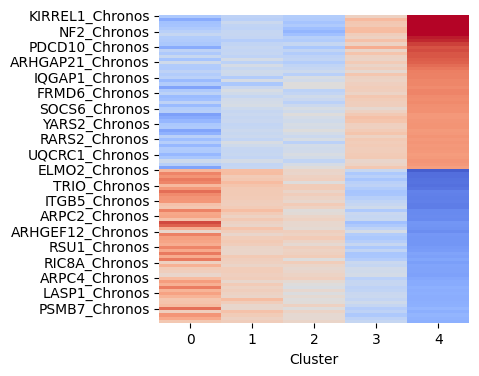

In [87]:
#Fig. 3d
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

norm_ch_ex = pd.DataFrame(StandardScaler().fit_transform(ch_ex), columns=ch_ex.columns, index=ch_ex.index)
norm_ch_ex['Cluster'] = ch_ex['Cluster']
ch_exg = norm_ch_ex.groupby("Cluster").mean().copy().T

from tqdm.notebook import tqdm
results = []
i = 4

df_filtered = ch_exg[ch_exg[i] == ch_exg.max(axis=1)].copy()
df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=False)
results.append(df_sorted.index.tolist())

df_filtered = ch_exg[ch_exg[i] == ch_exg.min(axis=1)].copy()
df_filtered['diff_to_other_mean'] = df_filtered.apply(lambda row: row[i] - row.drop(i).mean(), axis=1)
df_sorted = df_filtered.sort_values(by='diff_to_other_mean', ascending=True)
results.append(df_sorted.index.tolist())

rows = []
for i in range(2):
    ch_results = [r for r in results[i] if 'Chronos' in r]
    rows += ch_results[:50]
a = ch_exg.loc[rows]

low_chr = ch_results[:50]  

plt.figure(figsize=(4, 4))
sns.heatmap(a, cmap="coolwarm",vmax=1.5, vmin=-1.5,cbar=False)
plt.show()

C:\Users\ki949\AppData\Local\Temp\ipykernel_31004\2143398022.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", 5)
C:\Users\ki949\AppData\Local\Temp\ipykernel_31004\2143398022.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0)


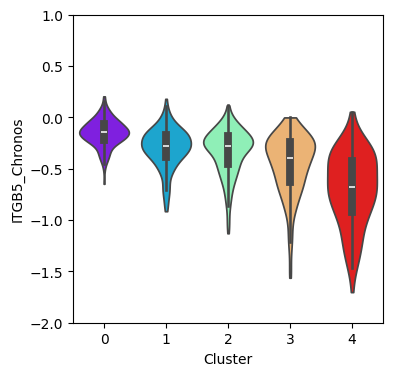

In [4]:
#Fig. 3f
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap("rainbow", 5) 
custom_palette = [cmap(i) for i in range(5)]
custom_palette = [(cmap(i)[0], cmap(i)[1], cmap(i)[2], 0.5) for i in range(5)]
value = "ITGB5_Chronos"

plt.figure(figsize=(4, 4))
sns.violinplot(data=ch_ex, x="Cluster", y=value, palette = custom_palette, cut=0) 
plt.ylim(-2, 1)
plt.savefig("../result/figure.svg")
plt.show()

### GO enrichment

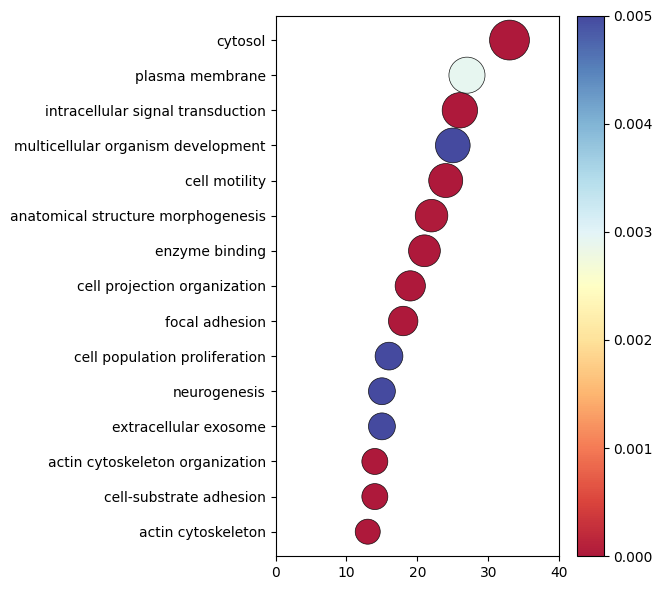

In [94]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
q = [g.split('_')[0] for g in high_exp]
q = [g.split('_')[0] for g in low_chr]

response = requests.post(
        url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
        json={
            'organism': 'hsapiens',
            'query': q,
            'sources': ['GO'],  # Only search Gene Ontology
            'user_threshold': 0.01,
            'significance_threshold_method': 'g_SCS',
            "highlight": True
        },
        headers={'User-Agent': 'PythonRequest'}
    )
results = response.json().get("result", [])
gost_df = pd.DataFrame(results)
enrich_df = gost_df[(gost_df["highlighted"])].nlargest(15, "intersection_size")
enrich_df = enrich_df.sort_values("intersection_size")
fig, ax = plt.subplots(figsize=(6.5, 6))
scatter = ax.scatter(
        x=enrich_df["intersection_size"],
        y=enrich_df["name"],
        s=enrich_df["intersection_size"] * 25,  # Scale size for visibility
        c=enrich_df["p_value"],
        cmap="RdYlBu",
        alpha=0.9,
        edgecolor="k",
        linewidth=0.5,
        vmax=0.005
    )

plt.xlim(0,40)
cbar = fig.colorbar(scatter)
plt.tight_layout()
plt.savefig("../result/figure.svg")
plt.show()

### RNA seq

In [32]:
import pandas as pd
rnaseq = pd.read_csv("../data/RNAseq.csv")
deg = pd.read_csv("../data/RNAseq_edger_results.csv")
import numpy as np
deg["-log10(FDR)"] = -np.log10(deg["FDR"])
df_up = deg[(deg["logFC"]>2) & (deg["-log10(FDR)"]>2)]
df_down = deg[(deg["logFC"]<-2) & (deg["-log10(FDR)"]>2)]

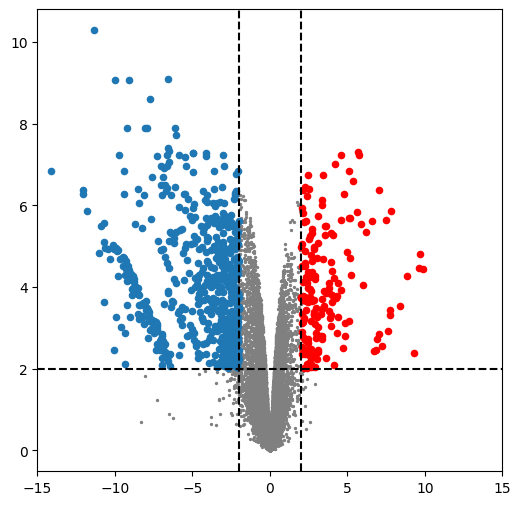

In [ ]:
#Fig. 5d
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.xlim((-15,15))
plt.scatter(deg["logFC"],deg["-log10(FDR)"],s=2,c="gray")
plt.scatter(df_up["logFC"],df_up["-log10(FDR)"],s=20,c="red")
plt.scatter(df_down["logFC"],df_down["-log10(FDR)"],s=20)
plt.axvline(2,color="black",linestyle="dashed")
plt.axhline(2,color="black",linestyle="dashed")
plt.axvline(-2,color="black",linestyle="dashed")
plt.show()

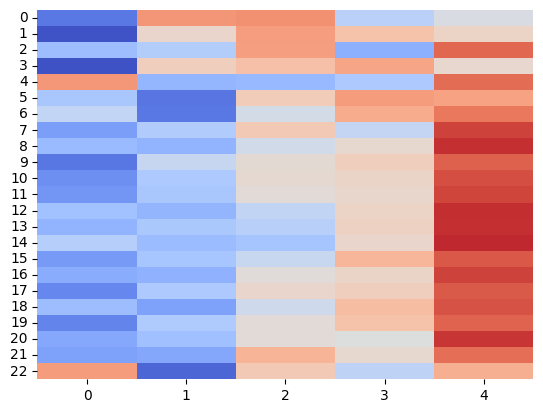

In [ ]:
#Fig. 5e, S7b
#Downregulated, cell-cell adhesion via plasma-membrane adhesion molecules
genes_down ="""AMIGO1
CADM4
CDH10
CLDN1
CLSTN2
ICAM1
MMP24
PCDHA6
PCDHB10
PCDHB13
PCDHB14
PCDHB16
PCDHB9
PCDHGA1
PCDHGA11
PCDHGA2
PCDHGA9
PCDHGB1
PCDHGB2
PCDHGB5
PCDHGB7
SCARF2
TRO""".strip().split()

#Upregulated, antigen processing and presentation of exogenous peptide antigen via MHC class II
genes_up="""CD74
CTSS
HLA-DMB
HLA-DPA1
HLA-DPB1
HLA-DRA
HLA-DRB1
HLA-DRB5""".strip().split()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
a = ch_ex.groupby("Cluster").mean()[[g+"_Expression" for g in genes_down]]
a = pd.DataFrame(StandardScaler().fit_transform(a)).T

sns.heatmap(a, cmap="coolwarm", vmin=-2,vmax=2,cbar=False)
plt.show()


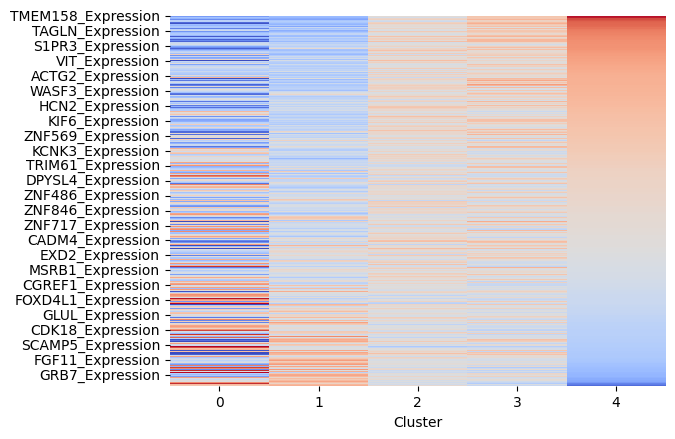

In [88]:
df_up = deg[(deg["logFC"]>2) & (deg["-log10(FDR)"]>2)]
df_down = deg[(deg["logFC"]<-2) & (deg["-log10(FDR)"]>2)]

upgenes = df_up.gene_symbol
downgenes = df_down.gene_symbol

a = ch_exg.loc[[str(u)+'_Expression' for u in upgenes if str(u)+'_Expression' in ch_exg.index]]
b = ch_exg.loc[[str(u)+'_Expression' for u in downgenes if str(u)+'_Expression' in ch_exg.index]]
a = a.sort_values(by=4, ascending=False)
b = b.sort_values(by=4, ascending=False)
#sns.heatmap(a, cmap="coolwarm", vmin=-1,vmax=1,cbar=False)
sns.heatmap(b, cmap="coolwarm", vmin=-1,vmax=1,cbar=False)

plt.show()

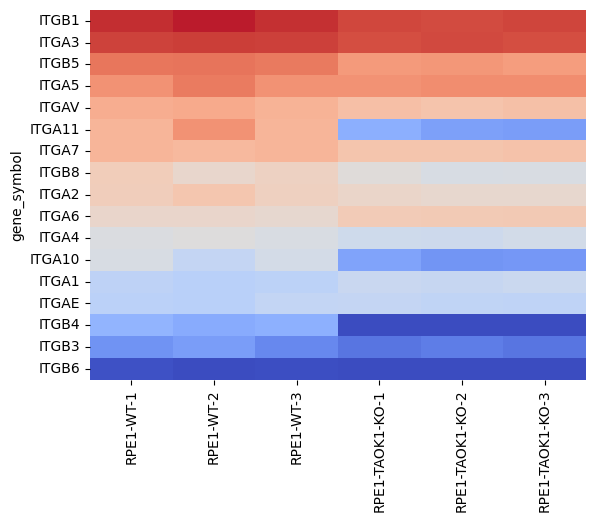

In [ ]:
import seaborn as sns
rnaseq =rnaseq.dropna(subset=["gene_symbol"])
integrin = rnaseq[rnaseq.gene_symbol.isin(['ITGA1','ITGA2','ITGA3','ITGA4','ITGA5','ITGA6','ITGA7','ITGA8','ITGA9','ITGA10', 'ITGA11','ITGAD','ITGAE','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4','ITGB5','ITGB6','ITGB7','ITGB8'])]
integrin.drop(columns=["ensembl_gene_id"], inplace=True)
sns.heatmap(integrin.set_index("gene_symbol"), cmap="coolwarm", vmin=0, vmax=12, cbar=False)
plt.savefig("../result/figure.svg")

In [ ]:
ch_ex2 = ch_ex.copy()
ch_ex2['Cluster'] = [ch_ex2['Cluster']==4]
#statistical test
import

KeyError: 'cluster'

In [45]:

prism = pd.read_csv("../data/PRISM.csv", index_col=0)
#prism.index = [id_to_name.get(i,'') for i in prism.index]

In [52]:
data = ch_ex.join(prism,how='left')

In [ ]:
from scipy.stats import mannwhitneyu
#ttest
from scipy.stats import 
gene = 'CILENGITIDE_PRISM'
g1 = data[data['Cluster']==4][gene].dropna()
g2 = data[data['Cluster']!=4][gene].dropna()
mannwhitneyu(g1, g2, alternative='two-sided')

MannwhitneyuResult(statistic=7307.0, pvalue=0.011742941067399247)